## Sentiment Analysis of Hilary Clinton's Emails

In [ ]:
pwd

In [3]:
import numpy as np
import pandas as pd
import sqlite3

In [ ]:
#read data from sqlite

con = sqlite3.connect('database.sqlite')
e = pd.read_sql_query("select distinct id_sentiment.field2 as id, id_sentiment.field3 as sentiment, \
MetadataSubject || ' ' || ExtractedBodyText as extractText From id_sentiment, Emails \
where id_sentiment.field2=Emails.id order by id;",con)

print(len(e.extractText));

cs = []
for i in range(len(e.extractText)): #len(e.ExtractedBodyText)):
    cs.append(str(e.extractText[i]))
    #print('#')
    #print(e.extractText[i])
    
print(len(cs))
import pandas as pd
a = pd.DataFrame(e)
a.to_csv("new_labeled.csv")
#print(cs)

In [ ]:
#text cleaning, tokenization, stemming, remove punctuation etc.

In [ ]:
data1=e
data1

In [17]:
singleStr = data1['extractText'][220]
print(singleStr)
singleStr = singleStr.lower()
singleStr

CONGRATULATIONS!! This is an major achievement, and an even greater disaster averted. AM


'congratulations!! this is an major achievement, and an even greater disaster averted. am'

In [18]:
import string
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from string import punctuation
print(string.punctuation)
stop_words = ['the','a','an','and','but','if','or','because','as','what','which','this','that','these','those','then',
              'just','so','than','such','both','through','about','for','is','of','while','during','to','what','which',
              'is','If','while','this', 'at', 'i']

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
for i in range(len(data1)):
    singleStr=data1['extractText'][i]
    singleStr=singleStr.lower()
    singleStr=text_to_wordlist(singleStr)
    data1['extractText'][i]=singleStr

In [ ]:
data1

In [ ]:
dat = data1
from nltk.tokenize import word_tokenize
text = dat[2470]
tokens = word_tokenize(text)
# stemming of words
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in tokens]
#print(stemmed[:100])
set(stemmed)

In [ ]:
print(len(stemmed))
set(stemmed)

In [ ]:
tmp=dat
count=0
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
for i in range(2470-1):
    text = dat[i]
    tokens = word_tokenize(text)
    # stemming of words
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in tokens]
    tmp[i] = set(stemmed)
    count=count+1
    print(count)
for i in range(2471,len(dat)):
    text = dat[i]
    tokens = word_tokenize(text)
    # stemming of words
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in tokens]
    tmp[i] = set(stemmed)
    count=count+1
    print(count)

In [ ]:
# 1 is happy, 2 is unhappy, 3 is neutral

In [ ]:
#read in sentiment manually labeled csv file

In [ ]:
X_train_tfidfdat2=pd.read_csv('subdat_labeled.csv')
len(dat2),'#', 
dat2.head(10)

In [ ]:
tmp2=[]
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
for i in range(len(dat2)):
    text = dat2['text'][i]
    tokens = word_tokenize(text)
    # stemming of words
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in tokens]
    #tmp2[i] = set(stemmed)
    tmp2.append(stemmed)
    #count=count+1
    #print(count)


In [ ]:
dat2=dat2.replace(0,3)
dat2.head(10)
#dat2['sentiment'][1], dat2['text'][1]

In [ ]:
#split data
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(dat2['text'], 
                                                    dat2['sentiment'], 
                                                    random_state=0)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

In [ ]:
print('X_train first entry:\n\n', X_train.iloc[2])
print('\n\nX_train shape: ', X_train.shape)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)
len(vect.get_feature_names())
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_vectorized, y_train)

print (clf.score(X_train_vectorized, y_train))
predictions = clf.predict(vect.transform(X_test))
#print clf.score(validation_vecs_ugdbow_tgdmm, y_validation)

In [ ]:
predictions

In [ ]:
np.array(y_test)

In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score
auc(np.array([1, 1, 2, 3, 3]),np.array([3, 2, 3, 3, 3]))


In [ ]:
y_test, '#,', predictions

In [ ]:
auc(y_test, predictions)

In [ ]:
from sklearn.metrics import roc_auc_score

# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))

print('AUC: ', auc(np.array(y_test), predictions))

In [ ]:
v = CountVectorizer(ngram_range=(2, 3))
print(v.fit(["an apple a day keeps the doctor away"]).vocabulary_)

In [ ]:
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=6, ngram_range=(1,3)).fit(X_train)
X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

In [ ]:
bigram_vectorizer =  CountVectorizer(stop_words='english', min_df=1, ngram_range=(3,3))
bigram_vectorizer.fit_transform(X_train)

In [ ]:
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=7).fit(X_train)
X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

In [ ]:
X_train_vectorized

In [ ]:
#60.8% AUC score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))
ytest=np.array(y_test)
#print('AUC: ', roc_auc_score(ytest, predictions))
np.array(y_test), '#,', predictions
# Compute the error
fpr, tpr, thresholds = metrics.roc_curve(np.array(y_test), predictions, pos_label=1)
print("Logistic regression AUC: {0}".format(metrics.auc(fpr, tpr)))

In [ ]:
type(predictions), type(np.array(y_test))

In [ ]:
np.array(y_test),'#',predictions

In [ ]:
roc_auc_score?

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
#vect = TfidfVectorizer(min_df=8).fit(X_train)
tfidf_vectorizer = TfidfVectorizer(max_df=15, min_df=8, max_features=no_features, stop_words='english')
vect = tfidf_vectorizer.fit(X_train)
len(vect.get_feature_names())

X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

#print('AUC: ', roc_auc_score(y_test, predictions))
np.array(y_test),'#',predictions

In [197]:
#topic modeling
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 500

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(X_train)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()


/Users/jumaoyuan/anaconda/envs/APS/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [198]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=15, min_df=8, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(X_train)
tf_feature_names = tf_vectorizer.get_feature_names()

In [199]:
len(tfidf_feature_names), '#', len(tf_feature_names)

(500, '#', 52)

In [208]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 3

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)


In [209]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print('#')
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
#display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
#
world life want team schedule yes week foreign ll report
Topic 1:
#
state did time got ve people talk way day family
Topic 2:
#
thank need com fyi sid day way tomorrow pm sent


In [ ]:
#max_df is used for removing terms that appear too frequently, 
#also known as "corpus-specific stop words". For example:
#max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
#max_df = 25 means "ignore terms that appear in more than 25 documents".
#The default max_df is 1.0, which means "ignore terms that appear in more than 100% of the documents". 
#Thus, the default setting does not ignore any terms.

#min_df is used for removing terms that appear too infrequently. For example:
#min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
#min_df = 5 means "ignore terms that appear in less than 5 documents".
#The default min_df is 1, which means "ignore terms that appear in less than 1 document". 
#Thus, the default setting does not ignore any terms.

In [ ]:
#full codes
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print "Topic %d:" % (topic_idx)
        print " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]])

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

no_features = 1000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

no_topics = 20

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

no_top_words = 10
display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda, tf_feature_names, no_top_words)

In [ ]:
#LDA visualization: pyLDAvis
import graphlab as gl
import pyLDAvis
import pyLDAvis.graphlab

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import numpy as np

def display_topics(H, W, feature_names, documents, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print (documents[doc_index])

# Single line documents from http://web.eecs.utk.edu/~berry/order/node4.html#SECTION00022000000000000000
documents = [
            "Human machine interface for Lab ABC computer applications",
            "A survey of user opinion of computer system response time",
            "The EPS user interface management system",
            "System and human system engineering testing of EPS",
            "Relation of user-perceived response time to error measurement",
            "The generation of random, binary, unordered trees",
            "The intersection graph of paths in trees",
            "Graph minors IV: Widths of trees and quasi-ordering",
            "Graph minors: A survey"
            ]

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

no_topics = 2

# Run NMF
nmf_model = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)
nmf_W = nmf_model.transform(tfidf)
nmf_H = nmf_model.components_

# Run LDA
lda_model = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
lda_W = lda_model.transform(tf)
lda_H = lda_model.components_

no_top_words = 4
no_top_documents = 4
display_topics(nmf_H, nmf_W, tfidf_feature_names, documents, no_top_words, no_top_documents)
display_topics(lda_H, lda_W, tf_feature_names, documents, no_top_words, no_top_documents)

In [ ]:
#ANN with Tfidf vectorizer
seed = 7
np.random.seed(seed)
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [ ]:
x_train, y_train, x_validation, y_validation = X_train, y_train, X_test, y_test
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time
import numpy as np
import matplotlib.pyplot as plt

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    #print "null accuracy: {0:.2f}%".format(null_accuracy*100)
    #print "accuracy score: {0:.2f}%".format(accuracy*100)
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    #print "train and test time: {0:.2f}s".format(train_test_time)
    #print "-"*80
    return accuracy, train_test_time

cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(10000,100001,10000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    #print (classifier)
    #print "\n"
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        #print "Validation result for {} features".format(n)
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()

feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3))


nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
#plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
#plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
#plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()
plt.show()

In [ ]:
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [ ]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [ ]:
#SA with DL (sentiment analysis, deep learning)

In [ ]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, load_model
from keras.layers import Dense, Embedding, LSTM, Bidirectional
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

data = pd.read_csv("subdat_labeled.csv")

tokenizer = Tokenizer(num_words=2000, split=' ')

tokenizer.fit_on_texts(data['text'])
X = tokenizer.texts_to_sequences(data['text'])
X = pad_sequences(X)
Y = data['sentiment']

# We can then create our train and test sets:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
#split data
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(dat2['text'], 
                                                    dat2['sentiment'], 
                                                    random_state=0)

## naive bayes

In [20]:
#split data
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data1['extractText'], 
                                                    data1['sentiment'], 
                                                    random_state=0)

In [21]:
len(X_train), len(X_test), X_train.shape

(182, 61, (182,))

In [22]:
#http://suruchifialoke.com/2017-06-10-sentiment-analysis-movie/
#naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

# Generate counts from text using a vectorizer  
# We can choose from other available vectorizers, and set many different options
# This code performs our step of computing word counts

#vectorizer = CountVectorizer(stop_words='english', max_df=.05)
from sklearn.feature_extraction.text import CountVectorizer

#bigram
vect =  CountVectorizer(stop_words='english', min_df=2, ngram_range=(1,1))
vect.fit_transform(X_train)

#ti-idf
#no_features = 300
#tfidf_vectorizer = TfidfVectorizer(min_df=2, max_features=no_features, stop_words='english')
#vect = tfidf_vectorizer.fit(X_train)
#len(vect.get_feature_names())
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

# Fit the CountVectorizer to the training data
#vect = CountVectorizer().fit(X_train)
#len(vect.get_feature_names())
# transform the documents in the training data to a document-term matrix
#X_train_vectorized = vect.fit_transform(X_train)
X_test_vectorized = vect.transform(X_test)

In [23]:
X_train_vectorized

<182x905 sparse matrix of type '<class 'numpy.int64'>'
	with 3266 stored elements in Compressed Sparse Row format>

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
nb = MultinomialNB()
nb.fit(X_train_vectorized, [int(r) for r in y_train])
predictions = nb.predict(X_test_vectorized)
predictions
actual = np.array(y_test)

In [25]:
actual =list(map(int, actual))
actual=np.asarray(actual)
actual

array([2, 1, 3, 3, 3, 3, 1, 3, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1,
       3, 1, 3, 3, 2, 1, 3, 2, 3, 3, 2, 3, 2, 3, 2, 2, 1, 2, 2, 3, 3, 3,
       2, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1])

In [26]:
predictions

array([2, 1, 3, 3, 3, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 2, 1, 2, 1, 3, 3, 3,
       2, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1])

In [27]:
import pandas as pd
y_actu = pd.Series(actual, name='Actual')
y_pred = pd.Series(predictions, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,1,2,3
Actual,,,
1,24,2,1
2,2,6,4
3,4,0,18


In [28]:
48/61

0.7868852459016393

In [179]:
from sklearn.metrics import accuracy_score
accuracy_score(actual, predictions)

0.7868852459016393

In [171]:
# Compute the error
fpr, tpr, thresholds = metrics.roc_curve(actual, predictions, pos_label=1)
print("Multinomal naive bayes AUC: {0}".format(metrics.auc(fpr, tpr)))

Multinomal naive bayes AUC: 0.14705882352941177


## logistic regression

In [189]:
from sklearn.feature_extraction.text import CountVectorizer
#vect = CountVectorizer(min_df=6, ngram_range=(1,3)).fit(X_train)
#X_train_vectorized = vect.transform(X_train)
#bigram
vect =  CountVectorizer(stop_words='english', min_df=5, ngram_range=(1,1))
vect.fit_transform(X_train)

#ti-idf
#no_features = 300
#tfidf_vectorizer = TfidfVectorizer(min_df=2, max_features=no_features, stop_words='english')
#vect = tfidf_vectorizer.fit(X_train)
#len(vect.get_feature_names())
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

len(vect.get_feature_names())

159

In [190]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)
len(vect.get_feature_names())

3346

In [191]:

# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_vectorized, y_train)

print (clf.score(X_train_vectorized, y_train))
predictions = clf.predict(vect.transform(X_test))
#print clf.score(validation_vecs_ugdbow_tgdmm, y_validation)

0.9945054945054945


In [192]:
predictions

array([2, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1,
       3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 1, 2, 2, 3, 3, 3,
       2, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 2, 1, 1, 2, 1])

In [193]:
actual = np.array(y_test)
actual

array([2, 1, 3, 3, 3, 3, 1, 3, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1,
       3, 1, 3, 3, 2, 1, 3, 2, 3, 3, 2, 3, 2, 3, 2, 2, 1, 2, 2, 3, 3, 3,
       2, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1])

In [194]:
import pandas as pd
y_actu = pd.Series(actual, name='Actual')
y_pred = pd.Series(predictions, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,1,2,3
Actual,,,
1,23,3,1
2,1,9,2
3,0,0,22


In [195]:
53/61

0.8688524590163934

In [196]:
from sklearn.metrics import accuracy_score
accuracy_score(actual, predictions)

0.8852459016393442

## SVM 

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
#split data
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data1['extractText'], 
                                                    data1['sentiment'], 
                                                    random_state=0)

In [45]:
#https://appliedmachinelearning.wordpress.com/2017/02/12/sentiment-analysis-using-tf-idf-weighting-pythonscikit-learn/
import os
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
model1 = LinearSVC()


#bigram
#vect =  CountVectorizer(stop_words='english', min_df=1, ngram_range=(5,5))
#vect.fit_transform(X_train)

#ti-idf
no_features = 300
tfidf_vectorizer = TfidfVectorizer(min_df=2, max_features=no_features, stop_words='english')
vect = tfidf_vectorizer.fit(X_train)
len(vect.get_feature_names())
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

#model = LogisticRegression()
#model.fit(X_train_vectorized, y_train)

#predictions = model.predict(vect.transform(X_test))

#print('AUC: ', roc_auc_score(y_test, predictions))





/Users/jumaoyuan/anaconda/envs/APS/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


<182x300 sparse matrix of type '<class 'numpy.float64'>'
	with 1864 stored elements in Compressed Sparse Row format>

In [46]:
model1.fit(X_train_vectorized, y_train)
predictions = model1.predict(vect.transform(X_test))

/Users/jumaoyuan/anaconda/envs/APS/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [47]:
actual = np.array(y_test)
actual

array([2, 1, 3, 3, 3, 3, 1, 3, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1,
       3, 1, 3, 3, 2, 1, 3, 2, 3, 3, 2, 3, 2, 3, 2, 2, 1, 2, 2, 3, 3, 3,
       2, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1])

In [48]:
predictions

array([2, 1, 3, 3, 3, 3, 1, 3, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1,
       3, 1, 3, 3, 2, 1, 3, 2, 3, 3, 1, 3, 2, 3, 3, 2, 1, 2, 3, 3, 3, 3,
       1, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 2, 1, 1, 2, 1])

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(actual, predictions)

0.9016393442622951

In [50]:
import pandas as pd
y_actu = pd.Series(actual, name='Actual')
y_pred = pd.Series(predictions, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,1,2,3
Actual,,,
1,25,2,0
2,2,8,2
3,0,0,22


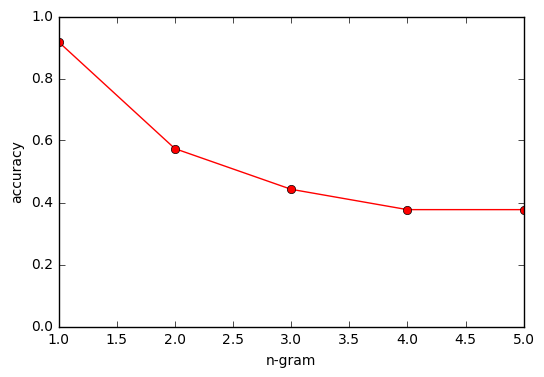

In [37]:
#n-gram
x=[1,2,3,4,5]
y=[0.9180,0.5738,0.4426,0.3770, 0.3770]
f1=plt.figure(figsize=(6,4))
plt.plot(x,y, 'ro-')
plt.axis([1,5,0,1])
plt.xlabel('n-gram')
plt.ylabel('accuracy')
plt.show()
f1.savefig('n-gram.png')

## LSTM Sentiment Analysis | Keras

In [ ]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.layers import Dropout
from keras.preprocessing import sequence
#from LSTMattempt import load_data
import pdb

In [ ]:
numpy.random.seed(7)
top_words = 100


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data1['extractText'], 
                                                    data1['sentiment'], 
                                                    random_state=0)

#print("x_train", X_train)
#print("y_train",y_train)
#pdb.set_trace()
#exit(0

In [ ]:
max_fatures = 4
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data1['extractText'].values)
X = tokenizer.texts_to_sequences(data1['extractText'].values)
X = pad_sequences(X)
print(len(X))

Y = pd.get_dummies(data1['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

In [ ]:
embedding_vecor_length = 200
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=X_train.shape[1]))
#model.add(LSTM(100))
#model.add(Flatten())
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same', activation='relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
    
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax')) #sigmoid
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


In [ ]:
model.fit(X_train, Y_train, epochs=10, batch_size=3)
score= model.evaluate(X_test, Y_test, verbose = 0, batch_size = batch_size)
print("Accuracy: %.2f%%" % (score[1]*100))

In [ ]:
#https://www.kaggle.com/ngyptr/lstm-sentiment-analysis-keras
X_train_tfidfdat2=pd.read_csv('subdat_labeled.csv')
data = data[['text', 'sentiment']]

In [1584]:
data = data[data.sentiment != 0]
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

print(data[ data['sentiment'] == 1].size)
print(data[ data['sentiment'] == 2].size)

for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')
    
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

AttributeError: 'list' object has no attribute 'sentiment'

In [1583]:
embed_dim = 128
lstm_out = 196

seed = 7
np.random.seed(seed)
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1], dropout=0.2,))
model.add(LSTM(lstm_out, dropout_U=0.2, dropout_W=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

/Users/jumaoyuan/anaconda/envs/APS/lib/python3.5/site-packages/ipykernel/__main__.py:12: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
/Users/jumaoyuan/anaconda/envs/APS/lib/python3.5/site-packages/ipykernel/__main__.py:13: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(196, dropout=0.2, recurrent_dropout=0.2)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_77 (Embedding)     (None, 98, 128)           512       
_________________________________________________________________
lstm_45 (LSTM)               (None, 196)               254800    
_________________________________________________________________
dense_121 (Dense)            (None, 2)                 394       
Total params: 255,706
Trainable params: 255,706
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
Y = pd.get_dummies(data['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

In [ ]:
batch_size = 32
model.fit(X_train, Y_train, nb_epoch = 7, batch_size=batch_size, verbose = 2)


In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
#validation_size = 100

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]



In [ ]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    
    result = model.predict(X_validate[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1



print("pos_acc", pos_correct/pos_cnt*100, "%")
print("neg_acc", neg_correct/neg_cnt*100, "%")

## Second try

In [ ]:
#LSTM with word2vec embeddings
#https://www.kaggle.com/lystdo/lstm-with-word2vec-embeddings

#NLP and SA with Python
#http://pythonforengineers.com/natural-language-processing-and-sentiment-analysis-with-python/

#visualizing graphlab's LDA topicmodel with pyLDAvis
#http://nbviewer.jupyter.org/github/bmabey/pyLDAvis/blob/master/notebooks/GraphLab.ipynb

#Text with LSTM Recurrent NN in Py with Keras
#https://machinelearningmastery.com/text-generation-lstm-recurrent-neural-networks-python-keras/



In [ ]:
#SA with DL
#http://thelillysblog.com/2017/10/02/sentiment-analysis-with-deep-learning/

Graph 

Tools
Before we start we need to make sure we have the following tools installed:

Python
TensorFlow - Google’s open sourced numeric computational library
Keras - Neural Network Framework, which can run on top of TensorFlow
Numpy - Package for scientific computations
Pandas - Package providing easy-to-use data structures and data analysis tools

In [ ]:
from collections import Counter
from datetime import datetime
 
import json
 
from keras.layers import Embedding, LSTM, Dense, Conv1D, MaxPooling1D, Dropout, Activation
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
 
import numpy as np

In [ ]:
datetime.now()

## NN, CNN, LSTM

In [ ]:
import numpy
import random
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import LSTM

In [ ]:
numpy.random.seed(7)
top_words = 1000


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data1['extractText'], 
                                                    data1['sentiment'], 
                                                    random_state=0)

#print("x_train", X_train)
#print("y_train",y_train)
#pdb.set_trace()
#exit(0

In [ ]:
X_train.shape, X_test.shape

In [1585]:
max_fatures = 4
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data1['extractText'].values)
X = tokenizer.texts_to_sequences(data1['extractText'].values)
X = pad_sequences(X)
print(len(X))

Y = pd.get_dummies(data1['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

243
(162, 98) (162, 3)
(81, 98) (81, 3)


In [1588]:
max_words = len(X_train)
verbose=0
batchsize=100
layersize=250
epoch=5
hidden=4
model = Sequential()
    #print X_train
#model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1], dropout=0.2,))
model.add(LSTM(100))
#model.add(Flatten())
model.add(Dense(layersize, activation='relu'))
for h in range(1,hidden):
    model.add(Dense(layersize, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
if (verbose == 1):
    print(model.summary())

#Fit the model
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epoch, batch_size=batchsize, verbose=verbose)
model.fit(X_train, Y_train, epochs=epoch, batch_size=batchsize)
# Final evaluation of the model
#score_test = model.evaluate(X_test, y_test, verbose=verbose)
#score_train = model.evaluate(X_train, y_train, verbose=verbose)
score= model.evaluate(X_test, Y_test, verbose = 0, batch_size = batch_size)

/Users/jumaoyuan/anaconda/envs/APS/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_80 (Embedding)     (None, 98, 128)           512       
_________________________________________________________________
lstm_48 (LSTM)               (None, 100)               91600     
_________________________________________________________________
dense_132 (Dense)            (None, 250)               25250     
_________________________________________________________________
dense_133 (Dense)            (None, 250)               62750     
_________________________________________________________________
dense_134 (Dense)            (None, 250)               62750     
_________________________________________________________________
dense_135 (Dense)            (None, 250)               62750     
_________________________________________________________________
dense_136 (Dense)            (None, 3)                 753       
Total para

In [ ]:
#score= model.evaluate(X_test, Y_test, verbose = 0, batch_size = batch_size)
print("Accuracy: %.2f%%" % (score[1]*100))

## text clearning function

In [ ]:
def text_to_wordlist(text, remove_stop_words=True, stem_words=False):
    # Clean the text, with the option to remove stop_words and to stem words.

    # Clean the text
    #text = re.sub(r"[^A-Za-z0-9]", " ", text)
    text = re.sub(r"what's", "", text)
    text = re.sub(r"What's", "", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"won't", "will not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"I'm", "I am", text)
    text = re.sub(r" m ", " am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"60k", " 60000 ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e-mail", "email", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r"quikly", "quickly", text)
    text = re.sub(r" usa ", " America ", text)
    text = re.sub(r" USA ", " America ", text)
    text = re.sub(r" u s ", " America ", text)
    text = re.sub(r" uk ", " England ", text)
    text = re.sub(r" UK ", " England ", text)
    text = re.sub(r"india", "India", text)
    text = re.sub(r"switzerland", "Switzerland", text)
    text = re.sub(r"china", "China", text)
    text = re.sub(r"chinese", "Chinese", text) 
    text = re.sub(r"imrovement", "improvement", text)
    text = re.sub(r"intially", "initially", text)
    text = re.sub(r"quora", "Quora", text)
    text = re.sub(r" dms ", "direct messages ", text)  
    text = re.sub(r"demonitization", "demonetization", text) 
    text = re.sub(r"actived", "active", text)
    text = re.sub(r"kms", " kilometers ", text)
    text = re.sub(r"KMs", " kilometers ", text)
    text = re.sub(r" cs ", " computer science ", text) 
    text = re.sub(r" upvotes ", " up votes ", text)
    text = re.sub(r" iPhone ", " phone ", text)
    text = re.sub(r"\0rs ", " rs ", text) 
    text = re.sub(r"calender", "calendar", text)
    text = re.sub(r"ios", "operating system", text)
    text = re.sub(r"gps", "GPS", text)
    text = re.sub(r"gst", "GST", text)
    text = re.sub(r"programing", "programming", text)
    text = re.sub(r"bestfriend", "best friend", text)
    text = re.sub(r"dna", "DNA", text)
    text = re.sub(r"III", "3", text) 
    text = re.sub(r"the US", "America", text)
    text = re.sub(r"Astrology", "astrology", text)
    text = re.sub(r"Method", "method", text)
    text = re.sub(r"Find", "find", text) 
    text = re.sub(r"banglore", "Banglore", text)
    text = re.sub(r" J K ", " JK ", text)
    text = re.sub(r'[0-9]+', '', text)
    
    # Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation])
    
    # Optionally, remove stop words
    if remove_stop_words:
        text = text.split()
        text = [w for w in text if not w in stop_words]
        text = " ".join(text)
    
    # Optionally, shorten words to their stems
    if stem_words:
        text = text.split()
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in text]
        text = " ".join(stemmed_words)
    
    # Return a list of words
    return(text)